In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import ast
import plotly.express as px

In [2]:
df = pd.read_csv("C:\\Users\\farde\\Desktop\\new_retail_data.csv")

In [3]:
df.head(2)

,Transaction_ID,Customer_ID,file,Address,Age,Gender,Income,Customer_Segment,Date,Time,...,Price,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
0,8691788.0,37249.0,Cus_Name:Michelle Harrington;email:Ebony39@gma...,"3959 Amanda Burgs, 77985, Dortmund, Berlin, Ge...",21.0,Male,Low,Regular,18-09-2023,22:03:55,...,108.028757,Clothing,Nike,Shorts,Excellent,Same-Day,Debit Card,Shipped,5.0,Cycling shorts
1,2174773.0,69749.0,Cus_Ntandard:Kelsey Hill;email:Mark36@gmail.co...,"82072 Dawn Centers, 99071, Nottingham, England...",19.0,Female,Low,Premium,31-12-2023,08:42:04,...,403.353907,Electronics,Samsung,Tablet,Excellent,Standard,Credit Card,Processing,4.0,Lenovo Tab


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302010 entries, 0 to 302009
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Transaction_ID    301677 non-null  float64
 1   Customer_ID       301702 non-null  float64
 2   file              301673 non-null  object 
 3   Address           302010 non-null  object 
 4   Age               301837 non-null  float64
 5   Gender            301693 non-null  object 
 6   Income            301720 non-null  object 
 7   Customer_Segment  301795 non-null  object 
 8   Date              301651 non-null  object 
 9   Time              301660 non-null  object 
 10  Total_Quantity    301649 non-null  float64
 11  Price             301653 non-null  float64
 12  Product_Category  301727 non-null  object 
 13  Product_Brand     301729 non-null  object 
 14  Product_Type      302010 non-null  object 
 15  Feedback          301826 non-null  object 
 16  Shipping_Method   30

# Part A: Necessary Data Cleaning 

### 1. Extracting Name, Email and Phone Number from Column File

In [5]:
print(df['file'].head())

0    Cus_Name:Michelle Harrington;email:Ebony39@gma...
1    Cus_Ntandard:Kelsey Hill;email:Mark36@gmail.co...
2    Cus_Name:Scott Jensen;email:Shane85@gmail.com;...
3    Cus_Ntandard:Joseph Miller;email:Mary34@gmail....
4    Cus_Ntandard:Debra Coleman;email:Charles30@gma...
Name: file, dtype: object


In [6]:
df['file'].str.split(';')[0][0].split(':')[1]

'Michelle Harrington'

In [7]:
df['file'].str.split(';')[0][1].split(':')[1]

'Ebony39@gmail.com'

In [8]:
df['file'].str.split(';')[0][2].split(':')[1]

'1414786801'

In [9]:
df_new = df.dropna(subset='file').copy()

In [10]:
df_new['Name'] = df_new['file'].apply(lambda x: x.split(sep=';')[0].split(sep=':')[1])

In [11]:
df_new['Email'] = df_new['file'].apply(lambda x: x.split(sep=';')[1].split(':')[1])

In [12]:
df_new['Phone Number'] = df_new['file'].apply(lambda x: x.split(sep=';')[2].split(sep=':')[1])

In [13]:
df_new.drop(columns=['file'], inplace=True)

In [14]:
df_new[['Name','Email','Phone Number']]

,Name,Email,Phone Number
0,Michelle Harrington,Ebony39@gmail.com,1414786801
1,Kelsey Hill,Mark36@gmail.com,6852899987
2,Scott Jensen,Shane85@gmail.com,8362160449
3,Joseph Miller,Mary34@gmail.com,2776751724
4,Debra Coleman,Charles30@gmail.com,9098267635
...,...,...,...
302005,Meagan Ellis,Courtney60@gmail.com,7466353743
302006,Mathew Beck,Jennifer71@gmail.com,5754304957
302007,Daniel Lee,Christopher100@gmail.com,9382530370
302008,Patrick Wilson,Rebecca65@gmail.com,9373222023


### 2. Extarcting Street Address, Pincode, City, State and Country from Address Column

In [15]:
df_new['Address'].head()

0    3959 Amanda Burgs, 77985, Dortmund, Berlin, Ge...
1    82072 Dawn Centers, 99071, Nottingham, England...
2    4133 Young Canyon, 75929, Geelong, New South W...
3    8148 Thomas Creek Suite 100, 88420, Edmonton, ...
4    5813 Lori Ports Suite 269, 48704, Bristol, Eng...
Name: Address, dtype: object

In [16]:
df_new['Street Address'] = df_new['Address'].apply(lambda x: x.split(sep=',')[0])

In [17]:
df_new['Zip_Code'] = df_new['Address'].apply(lambda x: x.split(sep=',')[1])

In [18]:
df_new['City'] = df_new['Address'].apply(lambda x: x.split(sep=',')[2])

In [19]:
df_new['Province/State'] = df_new['Address'].apply(lambda x: x.split(sep=',')[3])

In [20]:
df_new['Country'] = df_new['Address'].apply(lambda x: x.split(sep=',')[4])

In [21]:
df_new.drop(columns=['Address'], inplace=True)

In [22]:
df_new.rename(columns={'Street Address':'Address'}, inplace=True)

In [23]:
df_new[['Address', 'Zip_Code', 'City', 'Province/State', 'Country']].head(2)

,Address,Zip_Code,City,Province/State,Country
0,3959 Amanda Burgs,77985,Dortmund,Berlin,Germany
1,82072 Dawn Centers,99071,Nottingham,England,UK


### 3. Creating New Feedback Column with Certain Conditions

In [24]:
df_new['Feedbacks'] = df_new['Ratings'].apply(lambda x: 'Excellent' if x == 5 else 'Good' if x == 4 else 'Average' if x == 3 else 'Bad' if x == 2 else 'Very Bad' if x == 1 else np.nan)

In [25]:
df_new[['Ratings', 'Feedback', 'Feedbacks']]

,Ratings,Feedback,Feedbacks
0,5.0,Excellent,Excellent
1,4.0,Excellent,Good
2,2.0,Average,Bad
3,4.0,Excellent,Good
4,1.0,Bad,Very Bad
...,...,...,...
302005,1.0,Bad,Very Bad
302006,5.0,Excellent,Excellent
302007,2.0,Average,Bad
302008,4.0,Good,Good


In [26]:
df_new.drop(columns=['Feedback'], inplace=True)

In [27]:
df_new.drop(columns=['products'], inplace=True)

In [28]:
df_new['Product_Brand'].replace('Whirepool','Whirlpool', inplace=True)

C:\Users\farde\AppData\Local\Temp\ipykernel_19172\22469859.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_new['Product_Brand'].replace('Whirepool','Whirlpool', inplace=True)


### 4. Create a Total_Amount Column from Total_Quantity and Price Columns

In [29]:
df_new[['Total_Quantity', 'Price']].head(2)

,Total_Quantity,Price
0,3.0,108.028757
1,2.0,403.353907


In [30]:
df_new['Total_Amount'] = df_new['Total_Quantity'] * df_new['Price']

In [31]:
df_new[['Total_Quantity','Price','Total_Amount']].head()

,Total_Quantity,Price,Total_Amount
0,3.0,108.028757,324.086270
1,2.0,403.353907,806.707815
2,3.0,354.477600,1063.432799
3,7.0,352.407717,2466.854021
4,2.0,124.276524,248.553049


### 5.Marking Column Date as Date type which is Object for now and Extracting Month, Month Number and Year from Date

In [32]:
df_new['Date'] = pd.to_datetime(df_new['Date'])

C:\Users\farde\AppData\Local\Temp\ipykernel_19172\1250731367.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_new['Date'] = pd.to_datetime(df_new['Date'])


In [33]:
df_new['Month'] = df_new['Date'].dt.strftime('%b')

In [34]:
df_new['Year'] = df_new['Date'].dt.year

In [35]:
df_new['Year']

0         2023.0
1         2023.0
2         2023.0
3         2023.0
4         2024.0
           ...  
302005    2024.0
302006    2023.0
302007    2024.0
302008    2023.0
302009    2024.0
Name: Year, Length: 301673, dtype: float64

In [36]:
df_new.dropna(subset='Date', inplace=True)

In [37]:
df_new['Year'] = df_new['Year'].apply(int)

In [38]:
df_new['Total_Amount'] = df_new['Total_Amount'].replace(np.nan, 0)

In [39]:
df_new['Total_Amount'] = np.round(df_new['Total_Amount'],2)

In [40]:
df_new['Month Num'] = df_new['Date'].dt.month

# Part B: Exploratory Data Analysis

## 1. Customer Distribuition by Gender and Income Level

In [41]:
gen = df_new['Gender'].value_counts().reset_index()

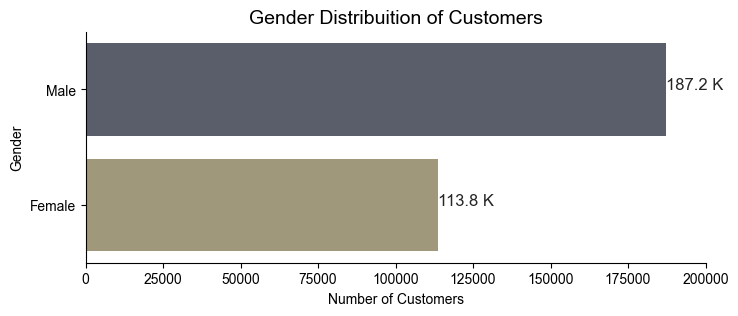

In [42]:
plt.figure(figsize=(8,3))
sns.barplot(data=gen, x='count', y='Gender', hue='Gender', palette='cividis')
sns.set_theme(style='ticks')
sns.despine()
for n, v in enumerate(gen['count']):
    plt.text(v,n,f'{v/1000:.1f} K')
plt.xlim(0,200000)
plt.xlabel('Number of Customers')
plt.ylabel('Gender')
plt.title('Gender Distribuition of Customers', fontsize=14)
plt.show()

In [43]:
df_new.groupby(['Gender','Income']).size().reset_index(name='Count')

,Gender,Income,Count
0,Female,High,26792
1,Female,Low,36641
2,Female,Medium,50291
3,Male,High,48192
4,Male,Low,59298
5,Male,Medium,79493


In [44]:
fig = px.bar(data_frame=df_new.groupby(['Gender','Income']).size().reset_index(name='Count'),
        x='Gender', y='Count', color='Income', barmode='group', title='Gender Distribution with Respect to Income Level of Customers',
        labels={'Gender':'Customers Gender', 'Count':'Number of Customers'}, width=700,
        color_discrete_sequence=px.colors.sequential.Inferno
        )
fig.show()

## 2. Overall Revenue Trend 

In [45]:
Monthly_grp = df_new.groupby(['Month', 'Month Num']).agg(
    Orders = ('Transaction_ID', 'count'),
    Amount = ('Total_Amount', 'sum')
).sort_values(by='Month Num', ascending=True)

In [46]:
Monthly_grp.reset_index(inplace=True)

In [47]:
Monthly_grp.drop(columns=['Month Num'], inplace=True)
Monthly_grp

,Month,Orders,Amount
0,Jan,25583,34655993.60
1,Feb,24100,33007127.39
2,Mar,25551,35131647.84
3,Apr,24649,33932410.29
4,May,25182,34385519.83
5,Jun,24747,33608087.18
6,Jul,25462,34752515.88
7,Aug,25457,35080728.76
8,Sep,24820,33830176.31
9,Oct,25528,34473556.57


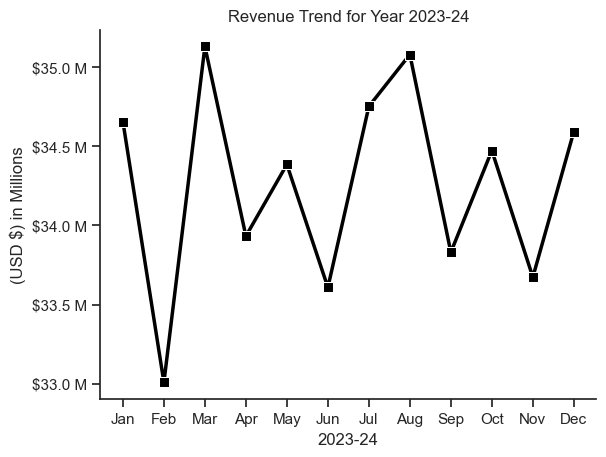

In [48]:
sns.lineplot(Monthly_grp,x='Month', y='Amount', linewidth=2.5, marker='s', markersize=7, color='black')
sns.set_theme(style='ticks')
sns.despine()
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y,pos: f'${y/1000000} M'))
plt.xlabel('2023-24')
plt.ylabel('(USD $) in Millions')
plt.title('Revenue Trend for Year 2023-24')
plt.show()

# Part C: Answering Problem Statements to make Ground Basis for Decisions 

## 1.Revenue by Customer Segments with their Contribuition to total Revenue

In [49]:
df_new['Total_Amount']

0          324.09
1          806.71
2         1063.43
3         2466.85
4          248.55
           ...   
302005     973.96
302006     285.14
302007     182.11
302008     120.83
302009    2382.23
Name: Total_Amount, Length: 301314, dtype: float64

In [50]:
cust_seg = df_new.groupby('Customer_Segment').agg(
    Revenue = ('Total_Amount', 'sum'),
    Count = ('Transaction_ID', 'size')
).reset_index()

In [51]:
cust_seg['Revenue'] = cust_seg['Revenue'].astype(int)

In [52]:
cust_seg.sort_values(by=['Revenue'], ascending=False, inplace=True)

In [53]:
cust_seg['rev_%'] = np.round((cust_seg['Revenue'] / cust_seg['Revenue'].sum()) * 100,2)

In [54]:
cust_seg.reset_index(drop=True, inplace=True)

In [55]:
cust_seg

,Customer_Segment,Revenue,Count,rev_%
0,Regular,199279408,145873,48.51
1,New,124140318,90972,30.22
2,Premium,87380653,64256,21.27


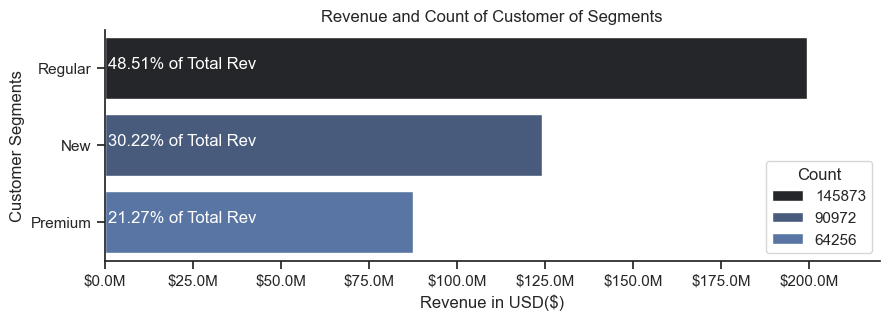

In [56]:
plt.figure(figsize=(10,3))
ax = sns.barplot(data=cust_seg, x='Revenue', y='Customer_Segment', hue='Count', palette='dark:b_r')
sns.set_theme(style='ticks')
sns.despine()
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${x/1000000}M'))

plt.ylabel('Customer Segments')
plt.xlabel('Revenue in USD($)')
plt.title('Revenue and Count of Customer of Segments')
plt.xlim(0,220000000)
for n, v in enumerate(cust_seg['rev_%']):
    plt.text(v+1000000,n,f'{v}% of Total Rev', color='white')

x, y = ax.get_legend_handles_labels()
ax.legend(x[::-1], y[::-1], title='Count')

plt.show()

## 2. Revenue by Product Category

In [57]:
cat_rev = df_new.groupby('Product_Category')['Total_Amount'].sum().reset_index().sort_values(by='Total_Amount', ascending=False)
cat_rev

,Product_Category,Total_Amount
2,Electronics,97094545.57
3,Grocery,90732498.25
1,Clothing,74577814.71
0,Books,74390812.12
4,Home Decor,73947989.68


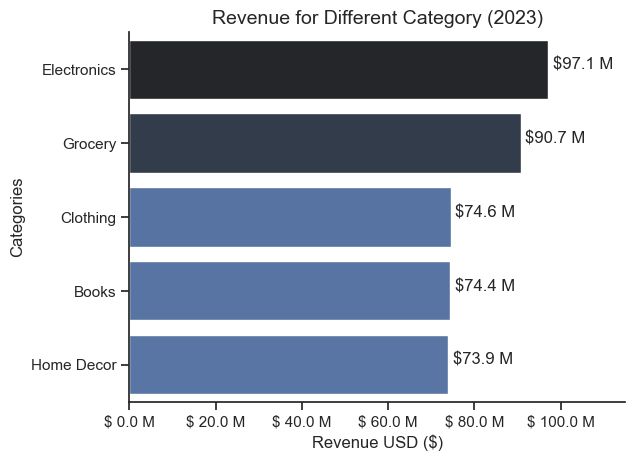

In [58]:
sns.barplot(data=cat_rev, x='Total_Amount', y='Product_Category', hue='Total_Amount', palette='dark:b_r', legend=False)
sns.set_theme(style='darkgrid')
sns.despine()
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'$ {x/1000000} M'))
plt.xlim(0,115000000)
plt.xlabel('Revenue USD ($)')
plt.ylabel('Categories')
plt.title('Revenue for Different Category (2023)', fontsize=14)
for n, v in enumerate(cat_rev['Total_Amount']):
    plt.text(v+1000000,n,f'${v/1000000:.1f} M')

## 3. Revenue by Category and Brand Distribuition (with Seaborn and Plotly Express)

In [59]:
cat_brd = df_new.groupby(['Product_Category','Product_Brand'])['Total_Amount'].sum().reset_index()
cat_brd.sort_values(by=['Product_Category','Total_Amount'], ascending=[True,False], inplace=True)
cat_brd

,Product_Category,Product_Brand,Total_Amount
0,Books,HarperCollins,24821105.25
1,Books,Penguin Books,24772002.17
2,Books,Random House,24700183.93
4,Clothing,Nike,24891010.09
5,Clothing,Zara,24874833.69
3,Clothing,Adidas,24728519.21
9,Electronics,Samsung,25259035.09
10,Electronics,Sony,24996584.19
6,Electronics,Apple,24520092.41
11,Electronics,Whirlpool,10049018.19


In [60]:
fig = px.bar(data_frame=cat_brd, x='Product_Brand', y='Total_Amount', color='Product_Category', barmode='group', color_discrete_sequence=px.colors.qualitative.Bold,
             title='Revenue by Category and Brand')
fig.update_layout(
    paper_bgcolor = 'white',
    plot_bgcolor = 'grey',
    yaxis = dict(tickprefix='$ '),
    xaxis = dict(tickangle=-45, automargin=True), margin=dict(t=40,b=0))
fig.update_traces(textfont_color='white')
fig.show()

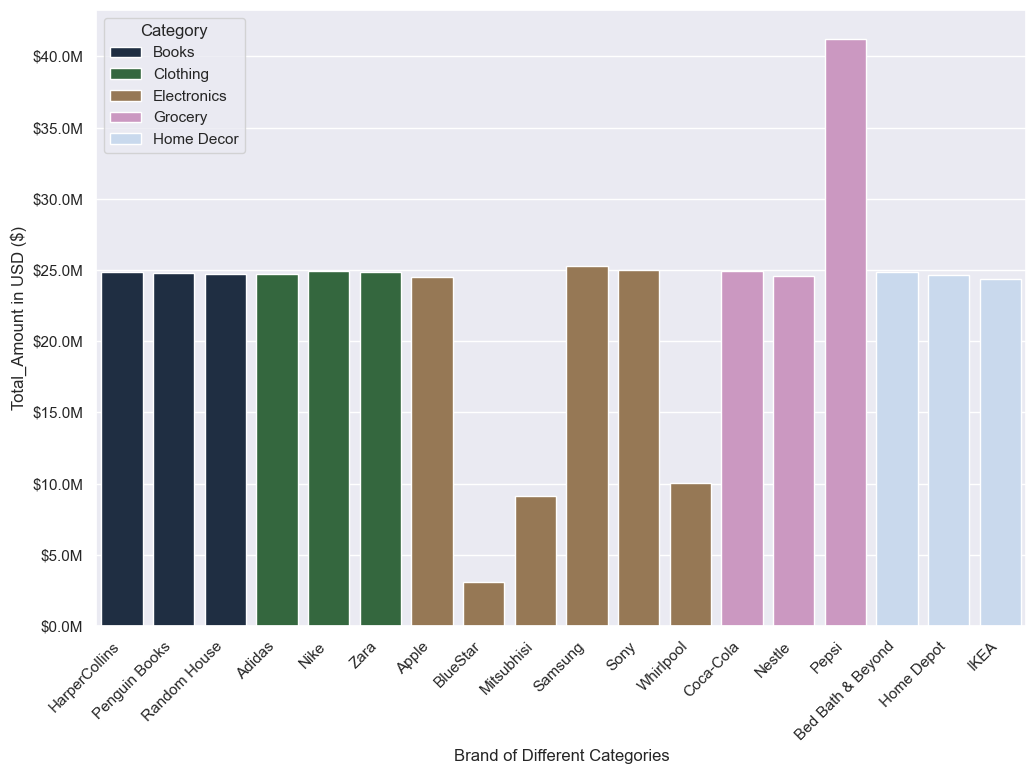

In [61]:
plt.figure(figsize=(12,8))
sns.set_theme(style='darkgrid')
sns.barplot(data=cat_brd.groupby(['Product_Category','Product_Brand'])['Total_Amount'].sum().reset_index(), x='Product_Brand', y='Total_Amount', hue='Product_Category', palette='cubehelix')
plt.legend(loc='upper left', title='Category')
plt.xticks(rotation=45, ha='right')
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${x/1000000}M'))
plt.xlabel('Brand of Different Categories')
plt.ylabel('Total_Amount in USD ($)')
plt.show()

## 4.Revenue Trend by Different Categories

In [62]:
trend_cat = df_new.pivot_table(index='Month', columns='Product_Category', values='Total_Amount', aggfunc='sum')

In [63]:
trend_cat.reset_index(inplace=True)
trend_cat

Product_Category,Month,Books,Clothing,Electronics,Grocery,Home Decor
0,Apr,6120293.68,6158985.07,8226123.37,7410443.00,5983899.81
1,Aug,6339090.26,6381192.94,8346607.52,7675283.86,6309461.65
2,Dec,6253814.86,6336755.51,8183164.79,7577727.40,6215673.38
3,Feb,6003961.59,5792153.15,7869693.65,7236094.08,6077713.39
4,Jan,6233445.45,6158358.59,8045049.33,7935757.50,6252716.04
5,Jul,6178043.21,6240870.74,8115816.61,7746102.04,6444427.78
6,Jun,6051069.74,5977906.44,8164209.90,7478652.48,5911969.89
7,Mar,6313511.56,6338052.23,8372334.57,7780433.47,6287351.05
8,May,6286269.11,6394630.15,8039866.62,7544678.71,6070567.33
9,Nov,6187223.97,6154145.92,7848954.79,7518800.90,5933157.48


In [64]:
trend_cat['Month_num'] = pd.to_datetime(trend_cat['Month'], format='%b').dt.month

In [65]:
trend_cat=trend_cat.sort_values(by='Month_num', ascending=True)
trend_cat

Product_Category,Month,Books,Clothing,Electronics,Grocery,Home Decor,Month_num
4,Jan,6233445.45,6158358.59,8045049.33,7935757.50,6252716.04,1
3,Feb,6003961.59,5792153.15,7869693.65,7236094.08,6077713.39,2
7,Mar,6313511.56,6338052.23,8372334.57,7780433.47,6287351.05,3
0,Apr,6120293.68,6158985.07,8226123.37,7410443.00,5983899.81,4
8,May,6286269.11,6394630.15,8039866.62,7544678.71,6070567.33,5
6,Jun,6051069.74,5977906.44,8164209.90,7478652.48,5911969.89,6
5,Jul,6178043.21,6240870.74,8115816.61,7746102.04,6444427.78,7
1,Aug,6339090.26,6381192.94,8346607.52,7675283.86,6309461.65,8
11,Sep,6031880.32,6307829.95,7978273.00,7162843.25,6317178.00,9
10,Oct,6392208.37,6336934.02,7904451.42,7665681.56,6143873.88,10


In [66]:
trend_cat.drop(columns=['Month_num'], inplace=True)

In [67]:
trend_cat.set_index('Month', inplace=True)
trend_cat

Product_Category,Books,Clothing,Electronics,Grocery,Home Decor
Month,,,,,
Jan,6233445.45,6158358.59,8045049.33,7935757.50,6252716.04
Feb,6003961.59,5792153.15,7869693.65,7236094.08,6077713.39
Mar,6313511.56,6338052.23,8372334.57,7780433.47,6287351.05
Apr,6120293.68,6158985.07,8226123.37,7410443.00,5983899.81
May,6286269.11,6394630.15,8039866.62,7544678.71,6070567.33
Jun,6051069.74,5977906.44,8164209.90,7478652.48,5911969.89
Jul,6178043.21,6240870.74,8115816.61,7746102.04,6444427.78
Aug,6339090.26,6381192.94,8346607.52,7675283.86,6309461.65
Sep,6031880.32,6307829.95,7978273.00,7162843.25,6317178.00


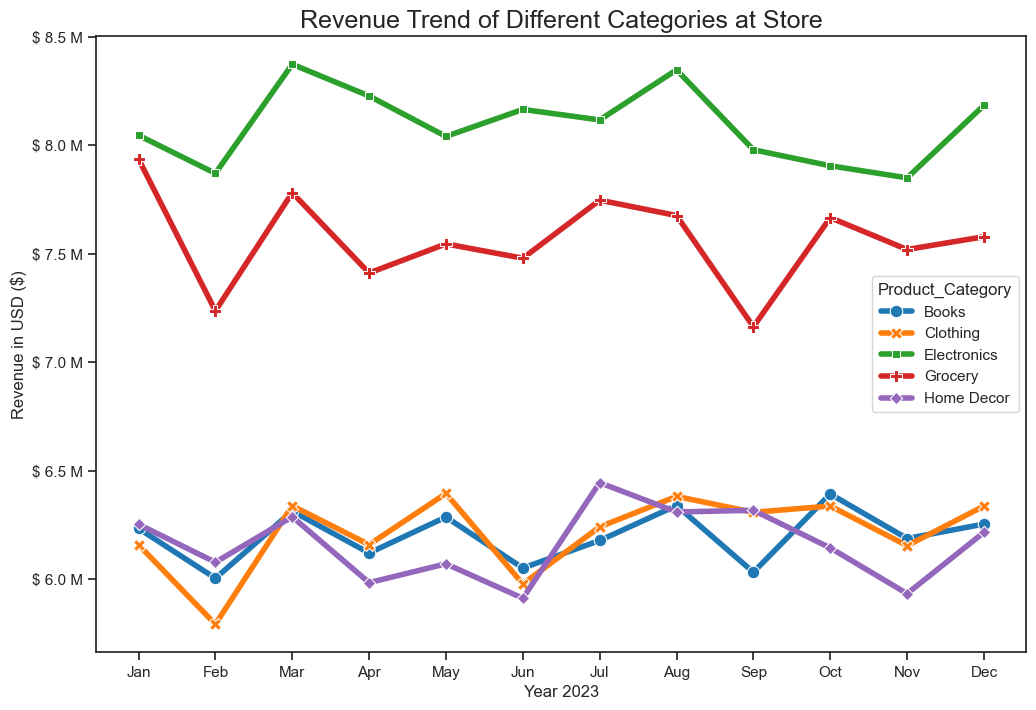

In [68]:
plt.figure(figsize=(12,8))
sns.set_theme(style='ticks')
sns.lineplot(data=trend_cat, legend=True, dashes=False, markers=True, linewidth=4, markersize=9, palette='tab10')
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'$ {x/1000000} M'))
plt.xlabel('Year 2023')
plt.ylabel('Revenue in USD ($)')
plt.title('Revenue Trend of Different Categories at Store', fontsize=18)
plt.show()


## 5.Transactional Value Distribuition by Payment Methods

In [69]:
pay_method = df_new.groupby('Payment_Method').agg(
    cnt = ('Payment_Method', 'count'),
    Revenue = ('Total_Amount', 'sum')
).sort_values(by='Revenue', ascending=False)

In [70]:
pay_method

,cnt,Revenue
Payment_Method,,
Credit Card,89934,1.228949e+08
Debit Card,76587,1.044777e+08
Cash,73647,1.003998e+08
PayPal,60850,8.295369e+07


In [71]:
pay_method['rev_perc'] = np.round(pay_method['Revenue'] / (pay_method['Revenue'].sum()/100),1)
pay_method

,cnt,Revenue,rev_perc
Payment_Method,,,
Credit Card,89934,1.228949e+08,29.9
Debit Card,76587,1.044777e+08,25.4
Cash,73647,1.003998e+08,24.4
PayPal,60850,8.295369e+07,20.2


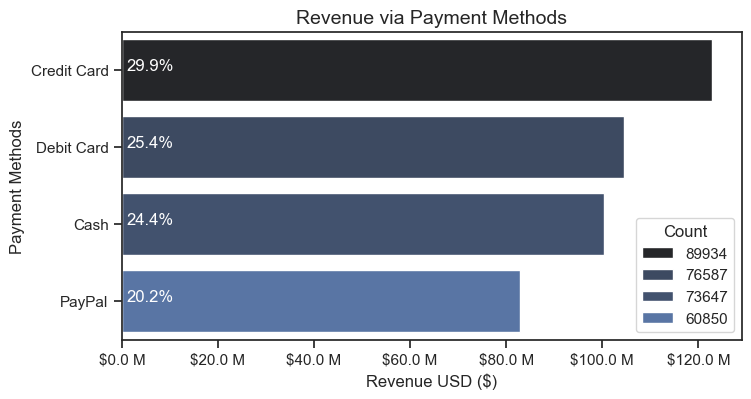

In [72]:
plt.figure(figsize=(8,4))
sns.barplot(data=pay_method, x='Revenue', y='Payment_Method', hue='cnt', palette='dark:b_r')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${x/1000000} M'))

x, y = ax.get_legend_handles_labels()
ax.legend(x[::-1], y[::-1], title='Count')

for n, v in enumerate(pay_method['rev_perc']):
    plt.text(v+1000000,n,f'{v}%', color='white')

plt.xlabel('Revenue USD ($)')
plt.ylabel('Payment Methods')
plt.title('Revenue via Payment Methods', fontsize=14)
plt.show()

## 6. Country with Their Best Performing State/Province

In [73]:
df_new = df_new.replace(' ',np.nan).reset_index()

In [74]:
df_new = df_new.dropna(subset=['Country']).reset_index()

In [75]:
df_new.groupby(['Country','Province/State']).size().reset_index(name='Orders').sort_values(by=['Country','Orders'], ascending=[True,False])[0:5]

,Country,Province/State,Orders
0,Australia,New South Wales,45158
1,Canada,Ontario,45142
2,Germany,Berlin,52649
3,UK,England,62854
10,USA,Connecticut,21600


In [76]:
cn_sta = df_new.groupby(['Country','Province/State']).size().reset_index(name='Orders').sort_values(by=['Country','Orders'], ascending=[True,False]).reset_index(drop=True)[0:5]
cn_sta = cn_sta.sort_values(by='Orders', ascending=False)
cn_sta

,Country,Province/State,Orders
3,UK,England,62854
2,Germany,Berlin,52649
0,Australia,New South Wales,45158
1,Canada,Ontario,45142
4,USA,Connecticut,21600


Text(0.5, 1.0, 'Countries with their Top Performing Province')

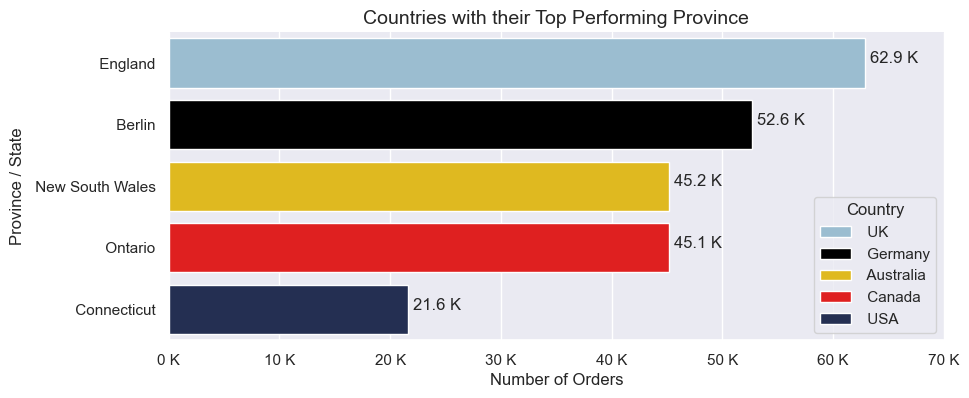

In [77]:
plt.figure(figsize=(10,4))
sns.set_theme(style='darkgrid')
sns.barplot(data=cn_sta, x="Orders", y='Province/State', hue='Country', palette=['#92c0d9','#000000','#FFCC00','#FF0000','#1c2b5a'])
sns.despine()
plt.xlim(0,70000)
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{int(x/1000)} K'))
for n,v in enumerate(cn_sta['Orders']):
    plt.text(v+500,n,f'{v/1000:.1f} K')
plt.xlabel('Number of Orders')
plt.ylabel('Province / State')
plt.title('Countries with their Top Performing Province', fontsize=14)

In [78]:
city = df_new.dropna(subset=['Country','Province/State','City']).groupby(['Country','Province/State','City'])['Total_Amount'].sum().reset_index(name='Revenue').sort_values(by=['Country','Revenue'], ascending=[True, False])
city.reset_index(drop=True, inplace=True)
city.dropna(inplace=True)
city

,Country,Province/State,City,Revenue
0,Australia,New South Wales,Mackay,3186113.64
1,Australia,New South Wales,Darwin,3183884.60
2,Australia,New South Wales,Hobart,3176905.42
3,Australia,New South Wales,Brisbane,3170761.99
4,Australia,New South Wales,Geelong,3160042.33
...,...,...,...,...
2625,USA,Mississippi,San Jose,5215.37
2626,USA,Utah,Las Vegas,4914.29
2627,USA,Kansas,Louisville,3734.47
2628,USA,Oregon,El Paso,3623.81


## 7. Revenue Distribution By [ Country -> State/Province -> City ]

In [79]:
fig = px.sunburst(data_frame=city, path=['Country','Province/State','City'], values='Revenue', width=1280, height=720,
                  title='Orders Counts By Country and City', color_discrete_sequence=px.colors.sequential.Cividis)
fig.update_layout(
    paper_bgcolor = 'black',
    plot_bgcolor = 'lightgrey',
    title_font_color='white',
    uniformtext=dict(minsize=10, mode='hide'),
    margin=dict(t=40,l=0,r=0,b=10))
fig.update_traces(rotation=90, textfont_color='white')
fig.show()

## 8. Distribuition Plot of Total_Amount Column to Understand Major Transactional Values Contributing to Total Revenue

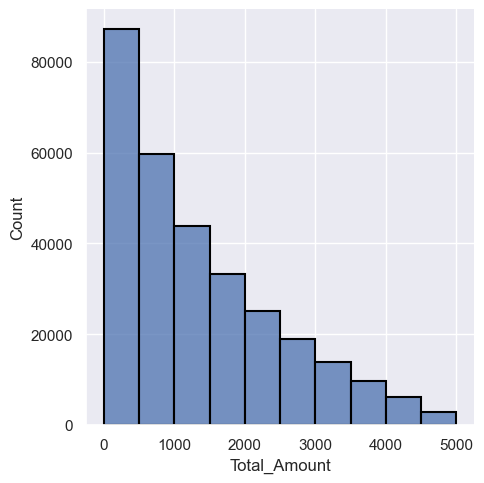

In [80]:
# Basic Method
ax = sns.displot(data=df_new, x='Total_Amount', bins=10, linewidth=1.5, edgecolor='black')

In [81]:
amount = df_new[['Transaction_ID','Total_Amount']]
amount = amount.dropna()
amount

,Transaction_ID,Total_Amount
0,8691788.0,324.09
1,2174773.0,806.71
2,6679610.0,1063.43
3,7232460.0,2466.85
4,4983775.0,248.55
...,...,...
301038,4246475.0,973.96
301039,1197603.0,285.14
301040,7743242.0,182.11
301041,9301950.0,120.83


In [82]:
# Linspace Method to Cut Create 10 bins of Amount Column 
np.round(np.linspace(min(df_new['Total_Amount']), max(df_new['Total_Amount']), 11),0).tolist()

[0.0,
 500.0,
 1000.0,
 1500.0,
 2000.0,
 2500.0,
 3000.0,
 3500.0,
 4000.0,
 4500.0,
 5000.0]

In [83]:
edges = np.linspace(min(amount['Total_Amount']), max(amount['Total_Amount']),11)
edges2 = np.round(edges,0)
edges2

array([   0.,  500., 1000., 1500., 2000., 2500., 3000., 3500., 4000.,
       4500., 5000.])

In [84]:
edges = np.linspace(min(amount['Total_Amount']), max(amount['Total_Amount']),11)
amount['binned'] = pd.cut(amount['Total_Amount'],bins=edges2, labels=[500, 1000, 1500, 2000, 2500, 3000, 3500, 4000,
       4500, 5000], include_lowest=True)
amount

,Transaction_ID,Total_Amount,binned
0,8691788.0,324.09,500
1,2174773.0,806.71,1000
2,6679610.0,1063.43,1500
3,7232460.0,2466.85,2500
4,4983775.0,248.55,500
...,...,...,...
301038,4246475.0,973.96,1000
301039,1197603.0,285.14,500
301040,7743242.0,182.11,500
301041,9301950.0,120.83,500


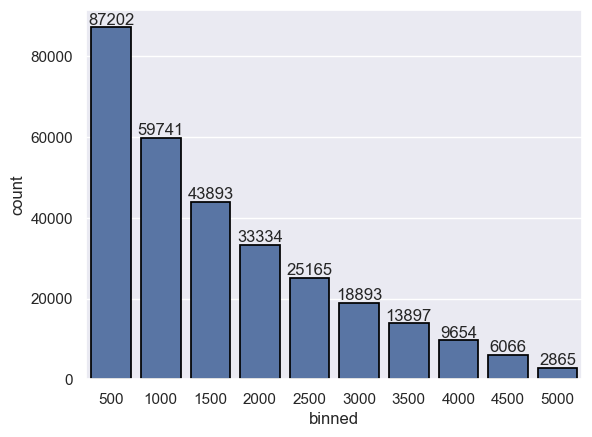

In [85]:
# Intermediate Method
ax = sns.countplot(data=amount, x='binned', linewidth=1.25, edgecolor='black')
sns.set_theme(style='ticks')
for x in ax.containers:
    ax.bar_label(x)

In [86]:
amount_grp = amount.groupby('binned').size().reset_index(name='Orders')
amount_grp['perc'] = np.round((amount_grp['Orders'] / amount_grp['Orders'].sum()) * 100,1)
amount_grp['binned'] = amount_grp['binned'].astype(int)
amount_grp

C:\Users\farde\AppData\Local\Temp\ipykernel_19172\3583450572.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,binned,Orders,perc
0,500,87202,29.0
1,1000,59741,19.9
2,1500,43893,14.6
3,2000,33334,11.1
4,2500,25165,8.4
5,3000,18893,6.3
6,3500,13897,4.6
7,4000,9654,3.2
8,4500,6066,2.0
9,5000,2865,1.0


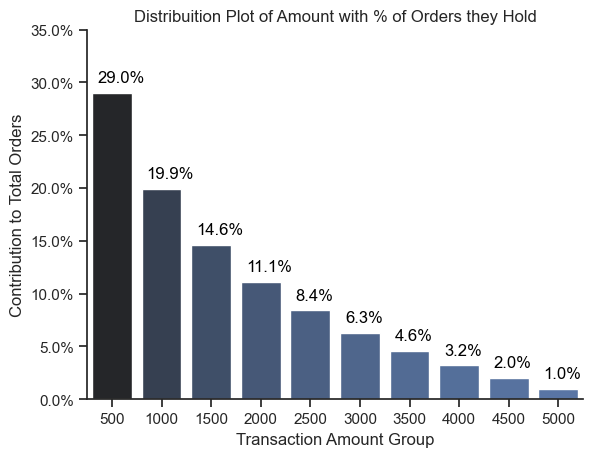

In [87]:
# Advance and more clear defination of Distribuition Plot
sns.set_theme(style='ticks')
sns.barplot(data=amount_grp, x='binned', y='perc', hue='perc', legend=False, palette='dark:b_r')
sns.despine()
for n, v in enumerate(amount_grp['perc']):
    plt.text(n-0.3,v+1,f'{v}%', color='black')
plt.ylabel('Contribution to Total Orders')
plt.xlabel('Transaction Amount Group')
plt.title('Distribuition Plot of Amount with % of Orders they Hold')
plt.ylim(0,35)
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y,pos: f'{y}%'))
plt.show()

## 9. Finding Top 10 Product Type and their Brands as well

In [88]:
df_new.groupby(['Product_Type']).agg(
    Revenue = ('Total_Amount','sum'),
    Quantity = ('Total_Quantity','sum')
).sort_values(by='Revenue',ascending=False).head(10).reset_index().replace({'Fiction':'Fiction_Books','Non-Fiction':'Non-Fiction_Books'})

,Product_Type,Revenue,Quantity
0,Water,33412093.17,130834.0
1,Smartphone,25271288.46,98338.0
2,Non-Fiction_Books,24703979.58,96984.0
3,Fiction_Books,24653850.05,96560.0
4,Shoes,16605598.74,64969.0
5,Television,16600005.04,65244.0
6,T-shirt,16595791.90,65330.0
7,Decorations,16500130.79,64671.0
8,Juice,16488573.29,65095.0
9,Tablet,16438248.31,64377.0


In [89]:
filtered_df = df_new[df_new['Product_Type'].isin(df_new.groupby(['Product_Type']).agg(
    Revenue = ('Total_Amount','sum'),
    Quantity = ('Total_Quantity','sum')
).sort_values(by='Revenue',ascending=False).head(10).index.tolist())]

In [90]:
top10type = filtered_df.groupby(['Product_Type','Product_Brand']).agg(
    Revenue = ('Total_Amount','sum')
).reset_index().sort_values(by=['Product_Type','Revenue'], ascending=[True,False]).replace({'Fiction':'Fiction_Books','Non-Fiction':'Non-Fiction_Books'})

In [91]:
top10type

,Product_Type,Product_Brand,Revenue
0,Decorations,Home Depot,8359261.45
1,Decorations,IKEA,8122148.31
2,Fiction_Books,HarperCollins,8238476.19
3,Fiction_Books,Penguin Books,8237150.93
4,Fiction_Books,Random House,8151620.90
5,Juice,Coca-Cola,8357122.86
6,Juice,Pepsi,8120567.80
8,Non-Fiction_Books,Penguin Books,8320634.31
9,Non-Fiction_Books,Random House,8250138.24
7,Non-Fiction_Books,HarperCollins,8105855.14


In [100]:
fig = px.sunburst(data_frame=top10type, path=['Product_Type','Product_Brand'],values='Revenue', width=1280, height=720, color='Product_Type',
                   color_discrete_sequence=px.colors.sequential.Inferno, title='Product Type with Respective Brand')
fig.update_traces(rotation=90, textfont_color='white')
fig.update_layout(
    paper_bgcolor = 'black',
    plot_bgcolor = 'white',
    margin=dict(t=30,l=0,r=0,b=0,),
    title_font_color = 'white'
)
fig.show()

## 10. Getting Deep Understanding of Rating on Category, Brand and Product Type

In [93]:
rating = df_new.dropna(subset=['Ratings']).copy()

In [94]:
rating.groupby(['Product_Category','Product_Brand','Product_Type']).agg(
    Count = ('Ratings','size'),
    avg_rating = ('Ratings', 'mean')
).sort_values(by=['Product_Category','Product_Brand','avg_rating'], ascending=[True,True,False])

Count  \
Product_Category Product_Brand     Product_Type                                
Books            HarperCollins     Fiction                              6046   
                                   Non-Fiction                          5998   
                                   Thriller                             6223   
                 Penguin Books     Non-Fiction                          6050   
                                   Children's                           6109   
                                   Fiction                              5902   
                 Random House      Literature                           6021   
                                   Fiction                              5990   
                                   Non-Fiction                          6019   
Clothing         Adidas            T-shirt                              6103   
                                   Jacket                               5963   
                                   Shoes                                6093   
                 Nike              T-shirt                              6016   
                                   Shoes                                5988   
                                   Shorts                               6050   
                 Zara              Shirt                                6100   
                                   Dress                                6087   
                                   Jeans                                6086   
Electronics      Apple             Smartphone                           6039   
                                   Tablet                               5998   
                                   Laptop                               5937   
                 BlueStar          BlueStar AC                          2252   
                 Mitsubhisi        Mitsubishi 1.5 Ton 3 Star Split AC   6712   
                 Samsung           Tablet                               6016   
                                   Television                           6111   
                                   Smartphone                           6151   
                 Sony              Television                           6022   
                                   Smartphone                           6165   
                                   Headphones                           6038   
                 Whirlpool         Fridge                               7418   
Grocery          Coca-Cola         Juice                                6143   
                                   Water                                6210   
                                   Soft Drink                           5946   
                 Nestle            Snacks                               5854   
                                   Coffee                               6144   
                                   Chocolate                            6019   
                 Pepsi             Water                               18146   
                                   Soft Drink                           6017   
                                   Juice                                6019   
Home Decor       Bed Bath & Beyond Bathroom                             5981   
                                   Kitchen                              6185   
                                   Bedding                              5980   
                 Home Depot        Furniture                            6028   
                                   Decorations                          6110   
                                   Tools                                5911   
                 IKEA              Furniture                            5871   
                                   Lighting                             6040   
                                   Decorations                          5989   

                                                                      

In [95]:
cat_rating = rating.pivot_table(index='Product_Category', columns='Ratings', aggfunc='size')
cat_rating

Ratings,1.0,2.0,3.0,4.0,5.0
Product_Category,,,,,
Books,8569,12518,7188,16527,9620
Clothing,8792,12435,7025,16889,9399
Electronics,8595,12526,12936,24903,11948
Grocery,8631,12478,13158,22758,9535
Home Decor,8527,12451,7158,16572,9438


In [96]:
cat_tot = cat_rating.sum(axis=1)
cat_tot

Product_Category
Books          54422
Clothing       54540
Electronics    70908
Grocery        66560
Home Decor     54146
dtype: int64

In [97]:
cat_perc = np.round(cat_rating.div(cat_tot/100,axis=0),1)
cat_perc.reset_index(inplace=True)
cat_perc

Ratings,Product_Category,1.0,2.0,3.0,4.0,5.0
0,Books,15.7,23.0,13.2,30.4,17.7
1,Clothing,16.1,22.8,12.9,31.0,17.2
2,Electronics,12.1,17.7,18.2,35.1,16.9
3,Grocery,13.0,18.7,19.8,34.2,14.3
4,Home Decor,15.7,23.0,13.2,30.6,17.4


In [98]:
cat_melt = pd.melt(cat_perc, id_vars='Product_Category', var_name='Ratings', value_name='perc')
cat_melt

,Product_Category,Ratings,perc
0,Books,1.0,15.7
1,Clothing,1.0,16.1
2,Electronics,1.0,12.1
3,Grocery,1.0,13.0
4,Home Decor,1.0,15.7
5,Books,2.0,23.0
6,Clothing,2.0,22.8
7,Electronics,2.0,17.7
8,Grocery,2.0,18.7
9,Home Decor,2.0,23.0


In [99]:
fig = px.bar(data_frame=cat_melt, x='Product_Category', y='perc', color='Ratings',barmode='group', color_discrete_sequence=px.colors.sequential.ice,
       labels={'Product_Category':'Categories of Products','perc':'% from Total Ratings','Ratings':'Star_Rating'}, text='perc',
       title='Categories with their % of Rating for each Rating Value')
fig.update_layout(bargap=0.15,
                  bargroupgap=0.1,
                  yaxis = dict(ticksuffix=" %"))
fig.show()